<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/statistical_inference_three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following code will load in a data set corresponding to the 2024 WNBA season. If you need to know what the variables mean you can find the original dataset [here](https://www.basketball-reference.com/wnba/years/2024_per_game.html):

### **Clone Business Analytics Repository**

In [1]:
!git clone https://github.com/pharringtonp19/business-analytics.git

Cloning into 'business-analytics'...
remote: Enumerating objects: 540, done.
remote: Counting objects: 100% (338/338), done.
remote: Compressing objects: 100% (206/206), done.
remote: Total 540 (delta 206), reused 209 (delta 123), pack-reused 202 (from 1)
Receiving objects: 100% (540/540), 8.19 MiB | 10.21 MiB/s, done.
Resolving deltas: 100% (296/296), done.


### **Import Libraries**

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt

### **Read In the Dataset**

In [3]:
df = pd.read_csv('/content/business-analytics/datasets/sportsref_download.csv')
df.head()

,Player,Team,Pos,G,MP,G.1,GS,MP.1,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Lindsay Allen,CHI,G,39,925,39,27,23.7,2.6,5.5,0.472,0.4,1.2,0.311,2.3,4.4,0.515,1.1,1.3,0.808,0.3,2.0,3.9,0.8,0.2,1.6,1.6,6.7
1,Rebecca Allen,PHO,F-G,18,447,18,18,24.8,2.9,7.1,0.417,1.4,3.9,0.352,1.6,3.1,0.500,0.1,0.2,0.667,0.7,3.9,1.1,0.9,0.7,1.0,1.9,7.4
2,Laeticia Amihere,ATL,F,15,73,15,0,4.9,0.4,1.6,0.250,0.0,0.0,NaN,0.4,1.6,0.250,0.3,1.1,0.294,0.8,1.7,0.2,0.1,0.2,0.4,0.5,1.1
3,Ariel Atkins,WAS,G,39,1175,39,39,30.1,5.4,12.5,0.432,1.9,5.5,0.346,3.5,7.0,0.500,2.2,2.5,0.848,0.9,3.5,3.1,1.4,0.4,2.3,2.8,14.9
4,Amy Atwell,PHO,F,5,41,5,0,8.2,0.6,2.2,0.273,0.4,1.8,0.222,0.2,0.4,0.500,0.2,0.2,1.000,0.6,0.8,0.6,0.0,0.2,0.4,0.6,1.8


### **Create New Columns**

In [4]:
df['PTS_demeaned'] = df['PTS'].map(lambda x: x - df['PTS'].mean())
df['AST_demeaned'] = df['AST'].map(lambda x: x - df['AST'].mean())

### **Mean of New Columns**

In [5]:
print(df['PTS_demeaned'].mean())
print(df['AST_demeaned'].mean())

3.904080965714836e-16
2.928060724286127e-17


In [7]:
df['PTS_demeaned_sqr'] = df['PTS'].map(lambda x: (x - df['PTS'].mean())**2)
df['AST_demeaned_sqr'] = df['AST'].map(lambda x: (x - df['AST'].mean())**2)

In [11]:
print(df['PTS_demeaned_sqr'].mean())
print(df['PTS'].var(ddof=0))

34.160412993599806
34.16041299359981


In [12]:
print(df['AST_demeaned_sqr'].mean())
print(df['AST'].var(ddof=0))

2.669756370003623
2.6697563700036264


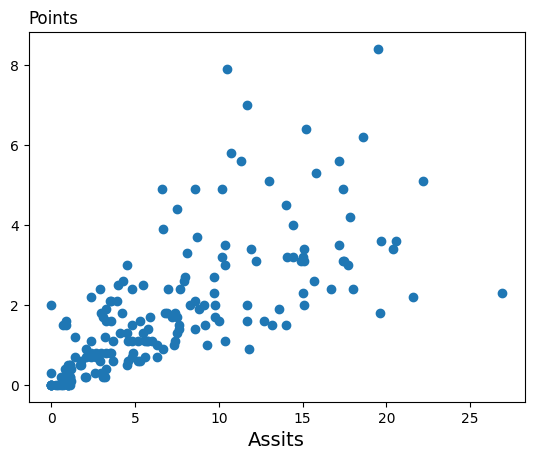

In [ ]:
plt.title('Points', loc='left')
plt.scatter(df['PTS'], df['AST'])
plt.xlabel('Assits', size=14)
plt.show()

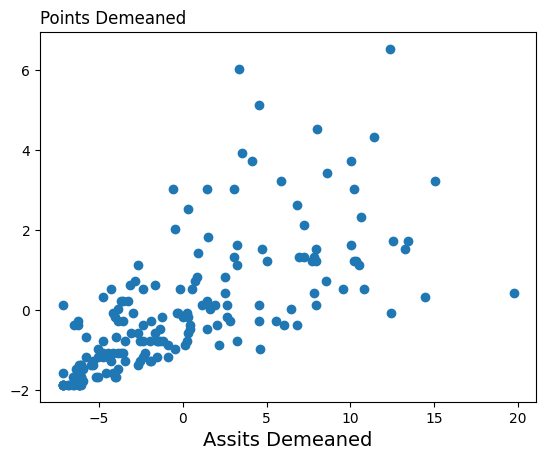

In [ ]:
plt.title('Points Demeaned', loc='left')
plt.scatter(df['PTS_demeaned'], df['AST_demeaned'])
plt.xlabel('Assits Demeaned', size=14)
plt.show()

In [ ]:
df['demeaned_product'] = df['PTS_demeaned'] * df['AST_demeaned']
df['demeaned_product'].mean()

6.610665378577465

### **Strong Correlation**

In [ ]:
df[['MP.1', 'FG']].corr()

,MP.1,FG
MP.1,1.000000,0.910706
FG,0.910706,1.000000


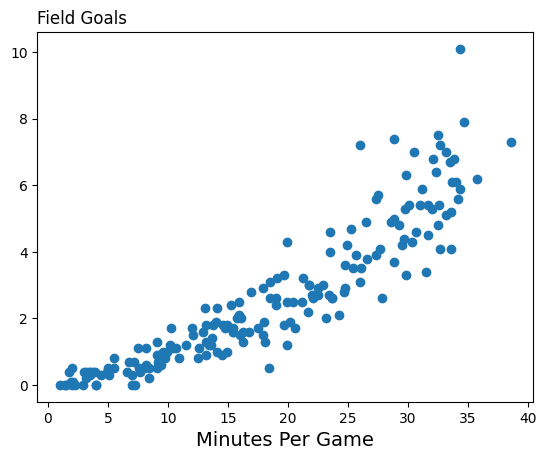

In [ ]:
plt.title('Field Goals', loc='left')
plt.scatter(df['MP.1'], df['FG'])
plt.xlabel('Minutes Per Game', size=14)
plt.show()

### **Moderate**

In [ ]:
df[['STL', 'BLK']].corr()

,STL,BLK
STL,1.000000,0.482449
BLK,0.482449,1.000000


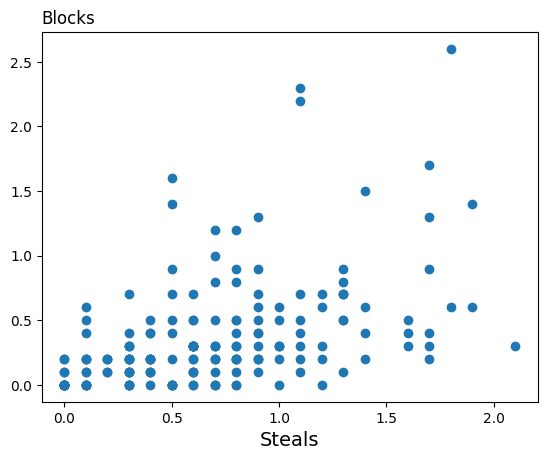

In [ ]:
plt.title('Blocks', loc='left')
plt.scatter(df['STL'], df['BLK'])
plt.xlabel('Steals', size=14)
plt.show()

### **Weak Correlation**

In [ ]:
df[['FTA', '3P%']].corr()

,FTA,3P%
FTA,1.000000,0.113348
3P%,0.113348,1.000000


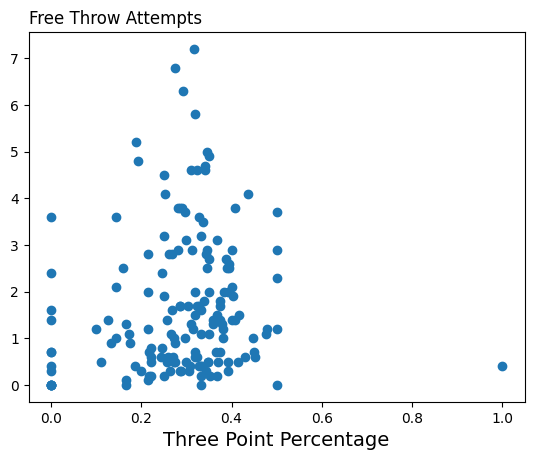

In [ ]:
plt.title('Free Throw Attempts', loc='left')
plt.scatter(df['3P%'], df['FTA'])
plt.xlabel('Three Point Percentage', size=14)
plt.show()

In [ ]:
df[['ORB', '3P%']].corr()

,ORB,3P%
ORB,1.000000,-0.061119
3P%,-0.061119,1.000000


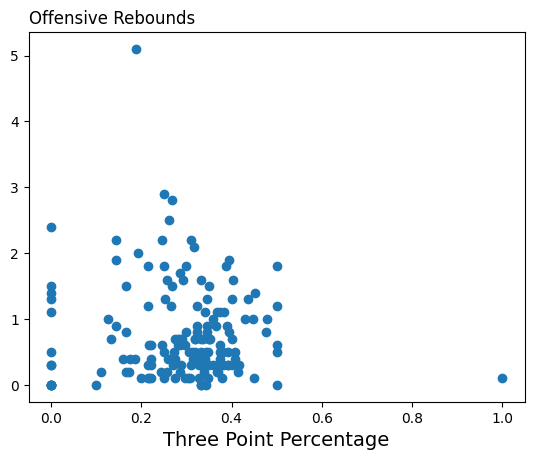

In [ ]:
plt.title('Offensive Rebounds', loc='left')
plt.scatter(df['3P%'], df['ORB'])
plt.xlabel('Three Point Percentage', size=14)
plt.show()

In [ ]:
df[['FTA', '3P%', 'BLK', 'STL', 'ORB', 'AST', 'MP.1', 'TOV']].corr()

,FTA,3P%,BLK,STL,ORB,AST,MP.1,TOV
FTA,1.000000,0.113348,0.462604,0.748810,0.561041,0.570583,0.792925,0.713533
3P%,0.113348,1.000000,0.018085,0.187528,-0.061119,0.144997,0.254058,0.093590
BLK,0.462604,0.018085,1.000000,0.482449,0.629429,0.221345,0.491449,0.349267
STL,0.748810,0.187528,0.482449,1.000000,0.482309,0.696929,0.847605,0.712368
ORB,0.561041,-0.061119,0.629429,0.482309,1.000000,0.178583,0.533732,0.389925
AST,0.570583,0.144997,0.221345,0.696929,0.178583,1.000000,0.771062,0.840130
MP.1,0.792925,0.254058,0.491449,0.847605,0.533732,0.771062,1.000000,0.819517
TOV,0.713533,0.093590,0.349267,0.712368,0.389925,0.840130,0.819517,1.000000


In [ ]:
condition = df['MP.1'] >= 5
new_df = df[condition]
new_df[['FTA', '3P%', 'BLK', 'STL', 'ORB', 'AST', 'MP.1', 'TOV']].corr()

,FTA,3P%,BLK,STL,ORB,AST,MP.1,TOV
FTA,1.000000,0.079849,0.408782,0.725055,0.514471,0.518010,0.783395,0.676807
3P%,0.079849,1.000000,-0.044229,0.177794,-0.133203,0.146888,0.251489,0.053810
BLK,0.408782,-0.044229,1.000000,0.424473,0.597341,0.130474,0.418896,0.257452
STL,0.725055,0.177794,0.424473,1.000000,0.412662,0.652531,0.824137,0.649411
ORB,0.514471,-0.133203,0.597341,0.412662,1.000000,0.075135,0.462325,0.295808
AST,0.518010,0.146888,0.130474,0.652531,0.075135,1.000000,0.733817,0.817267
MP.1,0.783395,0.251489,0.418896,0.824137,0.462325,0.733817,1.000000,0.765996
TOV,0.676807,0.053810,0.257452,0.649411,0.295808,0.817267,0.765996,1.000000
